In [13]:
# import modules
import uproot, sys, time, math, pickle, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from scipy.special import betainc
from scipy.stats import norm

# import config functions
sys.path.append('/home/jlai/mc23e/dark_photon_mc23e/config')
from plot_config import getWeight, zbi, sample_dict, getVarDict
from plot_var import variables, variables_mc, ntuple_names
from n_1_iteration_functions import get_best_cut, calculate_significance, apply_cut_to_fb, apply_all_cuts, compute_total_significance, n_minus_1_optimizer
# from cut_config import cut_config

# Set up plot defaults
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 14.0,10.0  # Roughly 11 cm wde by 8 cm high  
mpl.rcParams['font.size'] = 20.0 # Use 14 point font
sns.set(style="whitegrid")

font_size = {
    "xlabel": 17,
    "ylabel": 17,
    "xticks": 15,
    "yticks": 15,
    "legend": 14,
    "title": 20
}

plt.rcParams.update({
    "axes.labelsize": font_size["xlabel"],  # X and Y axis labels
    "xtick.labelsize": font_size["xticks"],  # X ticks
    "ytick.labelsize": font_size["yticks"],  # Y ticks
    "legend.fontsize": font_size["legend"],  # Legend
    "axes.titlesize": font_size["title"] # Title
})


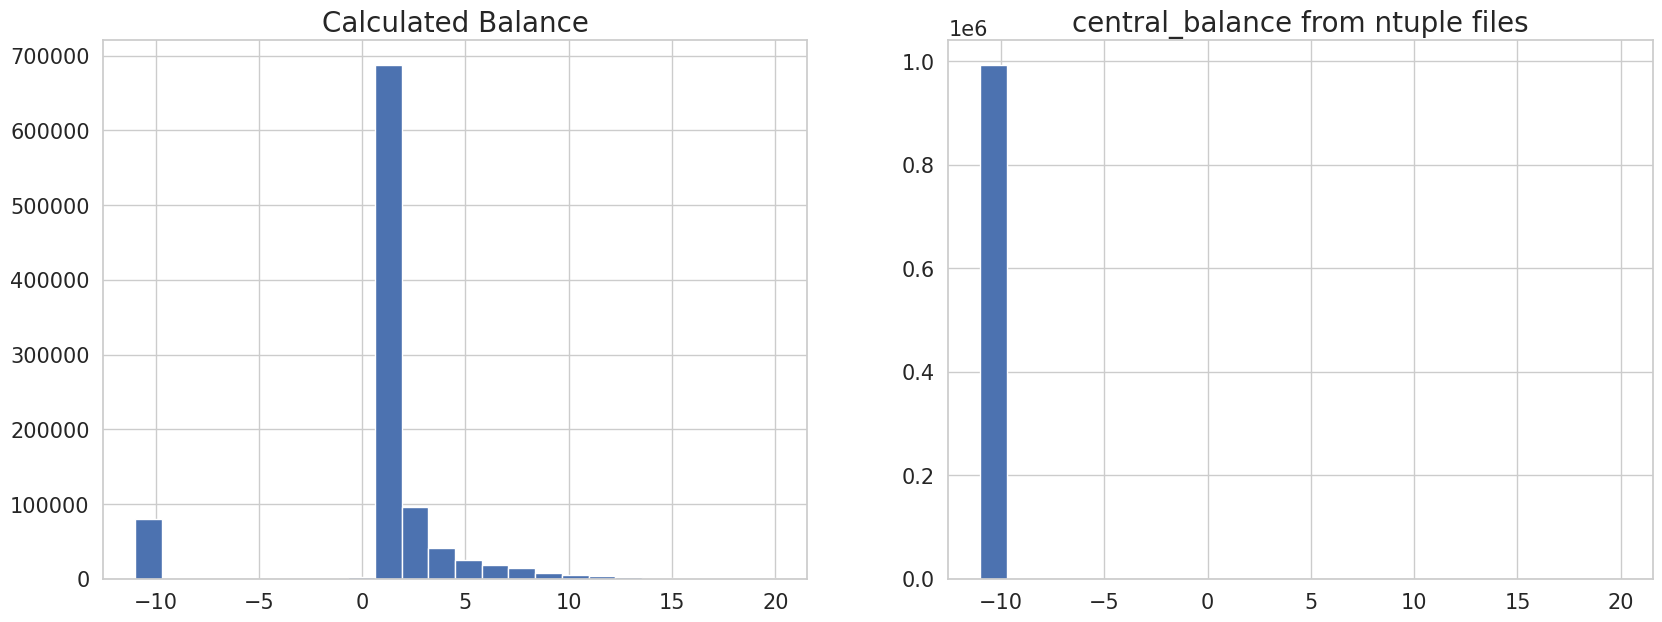

In [15]:
path = f"/data/fpiazza/ggHyyd/NtuplesWithBDTSkim/data23_eprobe_nominal_bdt.root"
f = uproot.open(path)['nominal']
fb = f.arrays(['el_pt', 'met_tst_et', 'jet_central_vecSumPt', 'central_balance', 'failJVT_jet_vecSumPt'], library='ak')
sumet_tmp = fb['jet_central_vecSumPt']
expr = (fb['met_tst_et'] + ak.firsts(fb['el_pt'])) / ak.where(sumet_tmp != 0, sumet_tmp, 1)
balance = ak.where(sumet_tmp != 0, expr, -10) 

plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.hist(balance, bins=np.linspace(-11, 20, 25))
plt.title('Calculated Balance')
plt.subplot(122)
plt.hist(fb['central_balance'], bins=np.linspace(-11, 20, 25))
plt.title('central_balance from ntuple files')
plt.show()


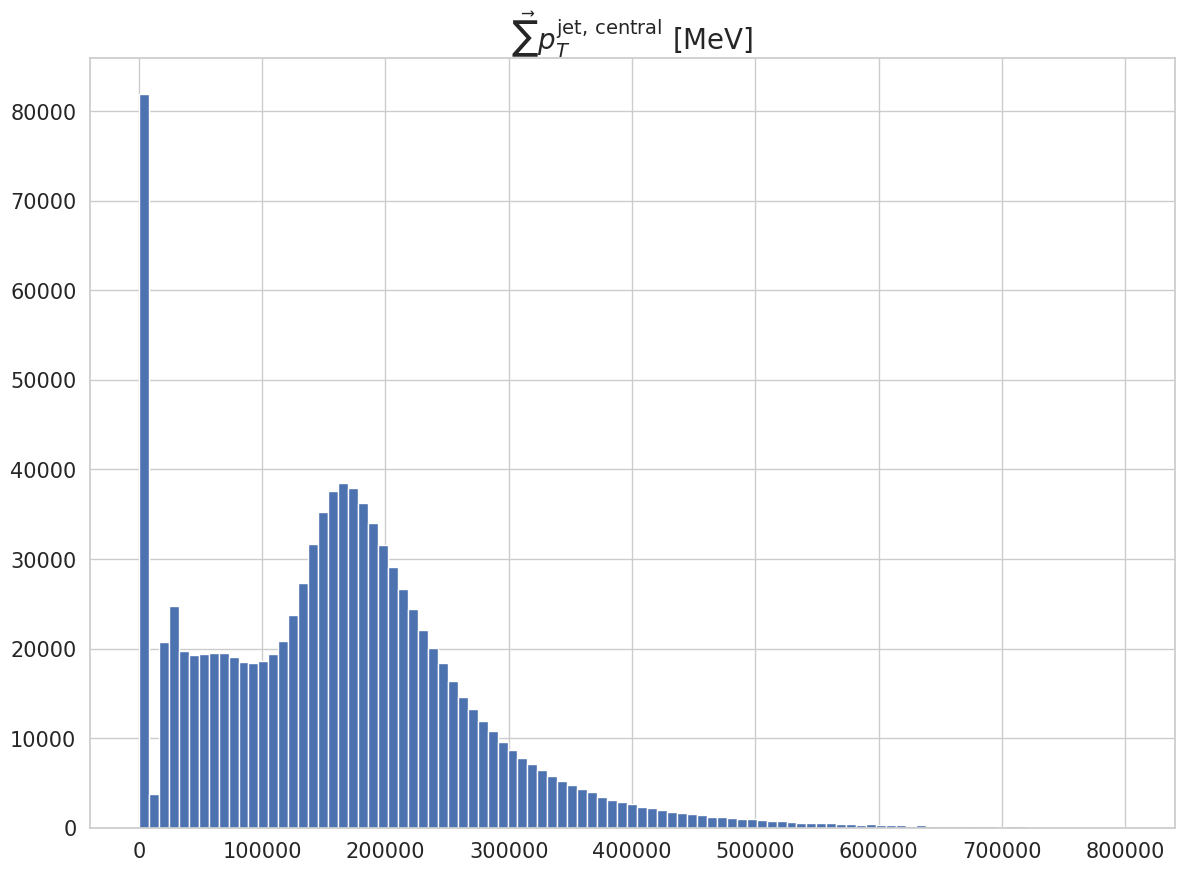

In [24]:
plt.hist(fb['jet_central_vecSumPt'], bins=np.linspace(0, 0.8e6, 100))
plt.title( r'$\vec{\sum}p_T^{\mathrm{jet,\,central}}\ [\mathrm{MeV}]$')
plt.show()